In [1]:
#!/usr/bin/python

import numpy as np
import math
from astropy.io import fits as fits
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
from pandas import DataFrame, Series
from astropy.wcs import WCS as WCS

import import_ipynb
import Pipe3D_Asier_Test as Pipe3D

from mpdaf.obj import hms2deg
from mpdaf.obj import dms2deg

from scipy import signal

/home/asier/anaconda2/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:7: Ru

importing Jupyter notebook from Pipe3D_Asier_Test.ipynb


/home/asier/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/home/asier/anaconda2/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/home/asier/anaconda2/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/home/asier/anaconda2/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/home/asier/anaconda2/lib/python2.7/site-packages/scipy/signal/_max_len_seq.py:8: RuntimeWarning: numpy.dtype size changed, may ind

In [97]:
line = 'ASASSN14db'
Pix_X = 170
Pix_Y = 170

alfa = 1.0
delta = 200
sigma = 200

In [98]:
# Call to Pipe3D code
line = Pipe3D.Pipe3D_galaxy(line)
# Generate the enviroment

In [99]:
# Tau array sorted and unique
s_SSP_id, s_age_SSP, s_met, s_logML = np.loadtxt('SSP_logML.txt', unpack='True')
s_age_SSP_sorted = np.argsort( s_age_SSP )
s_age = np.unique(s_age_SSP)
s_tau = np.sqrt( np.r_[ 0, s_age ] * np.r_[ s_age, 2*s_age[-1]-s_age[-2] ] ) * 1e9 # geometric mean between SSP ages

# Cumulative mass density (Solas Mass)
mass_density = line.cumulative_surface_density_spaxel(Pix_X , Pix_Y , False )

# Cosmic time (years)
AgeUnivers = s_tau[len(s_tau)-1]
t = AgeUnivers - s_tau

# Correction for numerical problems
mass_density = mass_density[:len(mass_density)-1]
t = t[:len(t)-1]

# Linear Cosmic Time
dt= (t[0]-t[1])
time = t[0] - np.arange(t[0]/dt) *dt

# Todas las unidades son por parsec cuadrado!!

# Linear Cumulative Mass (Solar Mass)
cumulative_mass = np.interp(-time, -t, mass_density)

# Star formation rate (Solar Mass per years)
sfr = -np.gradient(cumulative_mass) / dt
base = len(sfr)

# Delay Time Distribution (SN per Year per Solar Mass)
delta = int(delta*1e6/dt)
dtd = 1e-4 * time**-alfa
dtd[len(time)-delta:] = 0

# Sigma of the gaussian in Millions of years
temporal_smooth = sigma
gaus = signal.gaussian(len(time),temporal_smooth*1e6/dt)
extra = len(gaus[gaus>np.max(gaus)*1e-3])

sfr = np.convolve(sfr,gaus[gaus>np.max(gaus)*1e-3])/np.sum(gaus[gaus>np.max(gaus)*1e-3])

# Resize
sfr = sfr[extra/2:base+extra/2]

# SN Ia rate (SN per Year)
snr = dt * np.convolve(sfr,dtd)
ratio_Ia = snr[len(snr)/2]

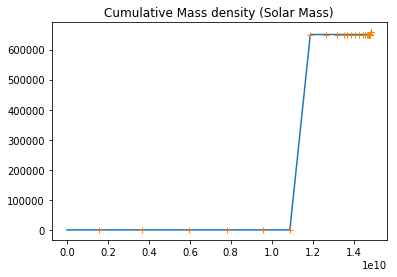

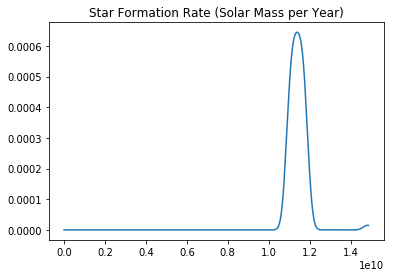

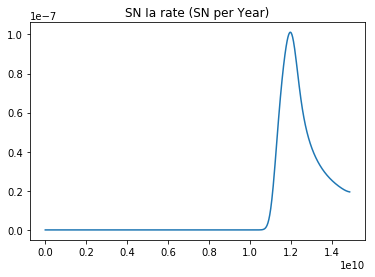

In [100]:
plt.plot(time,cumulative_mass)
plt.plot(t,mass_density,'+')
plt.title('Cumulative Mass density (Solar Mass)')
plt.show()

plt.plot(time,sfr)
plt.title('Star Formation Rate (Solar Mass per Year)')
plt.show()

plt.plot(time,snr[len(snr)/2:])
plt.title('SN Ia rate (SN per Year)')
plt.show()

In [101]:
ratio_Ia

1.9440552668830795e-08

In [46]:
a = ratio_Ia
a

2.104750743788237e-09